#  Chapter22　运用CNN进行图像识别的应用

- **22.1 数据的注水处理**
    - **22.1.1 ImageDataGenerator**
<br><br>
- **22.2 归一化**
    - **22.2.1 各种归一化方法**
    - **22.2.2 标准化**
    - **22.2.3 白化**
    - **22.2.4 批次归一化**
<br><br>

- **22.3 迁移学习与 VGG16**
    - **22.3.1 迁移学习**
    - **22.3.2 VGG16**
<br><br>
- **附加习题**
- **综合附加习题**



## ●22.1 数据的注水处理

### ○22.1.1 ImageDataGenerator

本节没有示例文件

## ●22.2 归一化

### ○22.2.1 各种归一化方法

本节没有示例文件

### ○22.2.2 标准化

#### □习题

In [ ]:
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i])
plt.suptitle('The original image', fontsize=12)
plt.show()

# 请创建生成器
datagen = 

# 进行标准化处理
g = datagen.flow(X_train, y_train, shuffle=False)
X_batch, y_batch = g.next()

# 对生成的图像进行处理，使其更适于浏览
X_batch *= 127.0 / max(abs(X_batch.min()), X_batch.max())
X_batch += 127.0
X_batch = X_batch.astype('uint8')

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_batch[i])
plt.suptitle('Standardization result', fontsize=12)
plt.show()

**程序清单 22.1：习题**

#### □参考答案

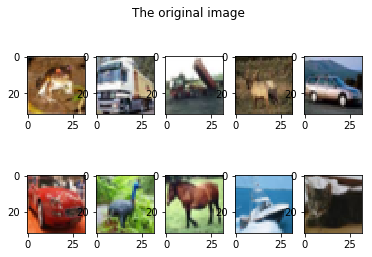

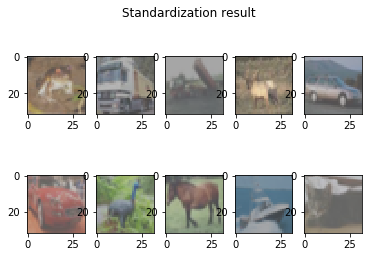

In [4]:
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i])
plt.suptitle('The original image', fontsize=12)
plt.show()

# 请创建生成器
datagen = ImageDataGenerator(samplewise_center=True, 
                             samplewise_std_normalization=True)

# 进行标准化处理
g = datagen.flow(X_train, y_train, shuffle=False)
X_batch, y_batch = g.next()

# 对生成的图像进行处理，使其更适于浏览
X_batch *= 127.0 / max(abs(X_batch.min()), X_batch.max())
X_batch += 127.0
X_batch = X_batch.astype('uint8')

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_batch[i])
plt.suptitle('Standardization result', fontsize=12)
plt.show()

**程序清单 22.2：参考答案**

### ○22.2.3 白化

#### □习题

In [ ]:
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# 在此将全部数据中的 300 张照片用于学习，100 张照片用于测试
X_train = X_train[:300]
X_test = X_test[:100]
y_train = y_train[:300]
y_test = y_test[:100]

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i])
plt.suptitle('The original image', fontsize=12)
plt.show()

# 请创建生成器
datagen = 

# 进行白化处理
datagen.fit(X_train)
g = datagen.flow(X_train, y_train, shuffle=False)
X_batch, y_batch = g.next()

# 对生成的图像进行处理，使其更适于浏览
X_batch *= 127.0 / max(abs(X_batch.min()), abs(X_batch.max()))
X_batch += 127
X_batch = X_batch.astype('uint8')

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_batch[i])
plt.suptitle('Whitening result', fontsize=12)
plt.show()

**程序清单 22.3：习题**

#### □参考答案

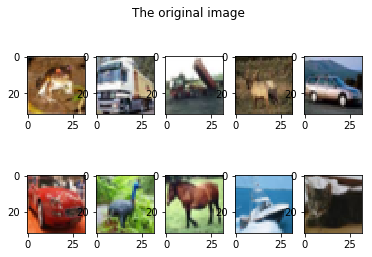

C:\Users\020138\AppData\Local\Continuum\anaconda3\envs\ten\lib\site-packages\keras_preprocessing\image.py:758: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


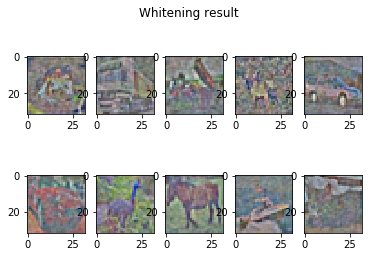

In [7]:
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# 在此将全部数据中的 300 张照片用于学习，100 张照片用于测试
X_train = X_train[:300]
X_test = X_test[:100]
y_train = y_train[:300]
y_test = y_test[:100]

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i])
plt.suptitle('The original image', fontsize=12)
plt.show()

# 请创建生成器
datagen = ImageDataGenerator(zca_whitening=True)

# 进行白化处理
datagen.fit(X_train)
g = datagen.flow(X_train, y_train, shuffle=False)
X_batch, y_batch = g.next()

# 对生成的图像进行处理，使其更适于浏览
X_batch *= 127.0 / max(abs(X_batch.min()), abs(X_batch.max()))
X_batch += 127
X_batch = X_batch.astype('uint8')

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_batch[i])
plt.suptitle('Whitening result', fontsize=12)
plt.show()

**程序清单22.4：参考答案**

### ○22.2.4 批次归一化

#### □习题

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Activation, Conv2D, Dense, Flatten, MaxPooling2D, BatchNormalization
from keras.models import Sequential, load_model
from keras.utils.np_utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = np.reshape(a=X_train, newshape=(-1, 28, 28, 1))[:300]
X_test = np.reshape(a = X_test,newshape=(-1, 28, 28, 1))[:300]
y_train = to_categorical(y_train)[:300]
y_test = to_categorical(y_test)[:300]

# model1（使用 sigmoid 函数作为激励函数的模型）进行定义
model1 = Sequential()
model1.add(Conv2D(input_shape=(28, 28, 1), filters=32,
                 kernel_size=(2, 2), strides=(1, 1), padding="same"))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(filters=32, kernel_size=(
    2, 2), strides=(1, 1), padding="same"))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Flatten())
model1.add(Dense(256))
model1.add(Activation('sigmoid'))
model1.add(Dense(128))
model1.add(Activation('sigmoid'))
model1.add(Dense(10))
model1.add(Activation('softmax'))

# 进行编译
model1.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])
# 进行学习
history = model1.fit(X_train, y_train, batch_size=32, epochs=3, 
                     validation_data=(X_test, y_test))

# 进行可视化处理
plt.plot(history.history['acc'], label='acc', ls='-', marker='o')
plt.plot(history.history['val_acc'], label='val_acc', ls='-', 
         marker='x')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.suptitle('model1', fontsize=12)
plt.show()

# model2（使用 ReLU 作为激励函数的模型）进行定义
model2 = Sequential()
model2.add(Conv2D(input_shape=(28, 28, 1), filters=32,
                 kernel_size=(2, 2), strides=(1, 1), padding="same"))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(filters=32, kernel_size=(
    2, 2), strides=(1, 1), padding="same"))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(256))
model2.add(Activation('relu'))
# 请在下方添加批次归一化处理的代码

model2.add(Dense(128))
model2.add(Activation('relu'))
# 请在下方添加批次归一化处理的代码

model2.add(Dense(10))
model2.add(Activation('softmax'))

# 进行编译
model2.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])
# 进行学习
history = model2.fit(X_train, y_train, batch_size=32, epochs=3, 
                     validation_data=(X_test, y_test))

# 进行可视化处理
plt.plot(history.history['acc'], label='acc', ls='-', marker='o')
plt.plot(history.history['val_acc'], label='val_acc', ls='-', 
         marker='x')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.suptitle('model2', fontsize=12)
plt.show()

**程序清单 22.5：习题**

#### □参考答案

Train on 300 samples, validate on 300 samples
Epoch 1/3
300/300 [==============================] - 1s 2ms/step - loss: 2.5468 - acc: 0.0767 - val_loss: 2.3175 - val_acc: 0.1133
Epoch 2/3
300/300 [==============================] - 0s 891us/step - loss: 2.2688 - acc: 0.1400 - val_loss: 2.2246 - val_acc: 0.2400
Epoch 3/3
300/300 [==============================] - 0s 764us/step - loss: 2.1603 - acc: 0.2567 - val_loss: 2.1726 - val_acc: 0.2700


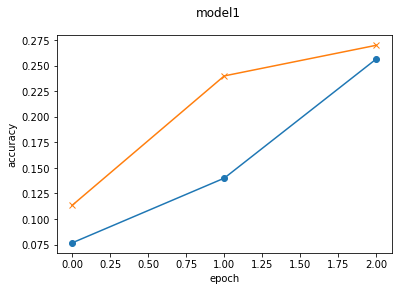

Train on 300 samples, validate on 300 samples
Epoch 1/3
300/300 [==============================] - 1s 3ms/step - loss: 1.6429 - acc: 0.4567 - val_loss: 2.0779 - val_acc: 0.4733
Epoch 2/3
300/300 [==============================] - 0s 1ms/step - loss: 0.7126 - acc: 0.8233 - val_loss: 1.3106 - val_acc: 0.6000
Epoch 3/3
300/300 [==============================] - 0s 951us/step - loss: 0.4134 - acc: 0.8967 - val_loss: 1.1530 - val_acc: 0.6267


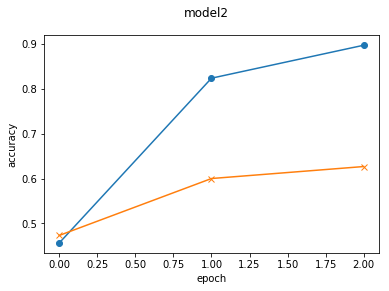

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Activation, Conv2D, Dense, Flatten, MaxPooling2D, BatchNormalization
from keras.models import Sequential, load_model
from keras.utils.np_utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = np.reshape(a=X_train, newshape=(-1,28,28,1))[:300]
X_test = np.reshape(a = X_test,newshape=(-1,28,28,1))[:300]
y_train = to_categorical(y_train)[:300]
y_test = to_categorical(y_test)[:300]

# model1（使用 sigmoid 函数作为激励函数的模型）进行定义
model1 = Sequential()
model1.add(Conv2D(input_shape=(28, 28, 1), filters=32,
                 kernel_size=(2, 2), strides=(1, 1), padding="same"))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(filters=32, kernel_size=(
    2, 2), strides=(1, 1), padding="same"))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Flatten())
model1.add(Dense(256))
model1.add(Activation('sigmoid'))
model1.add(Dense(128))
model1.add(Activation('sigmoid'))
model1.add(Dense(10))
model1.add(Activation('softmax'))

# 进行编译
model1.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])
# 进行学习
history = model1.fit(X_train, y_train, batch_size=32, epochs=3, 
                     validation_data=(X_test, y_test))

# 进行可视化处理
plt.plot(history.history['acc'], label='acc', ls='-', marker='o')
plt.plot(history.history['val_acc'], label='val_acc', ls='-', 
         marker='x')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.suptitle('model1', fontsize=12)
plt.show()


# model2（使用 ReLU 作为激励函数的模型）进行定义
model2 = Sequential()
model2.add(Conv2D(input_shape=(28, 28, 1), filters=32,
                 kernel_size=(2, 2), strides=(1, 1), padding="same"))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(filters=32, kernel_size=(
    2, 2), strides=(1, 1), padding="same"))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(256))
model2.add(Activation('relu'))
# 请在下方添加批次归一化处理的代码
model2.add(BatchNormalization())
model2.add(Dense(128))
model2.add(Activation('relu'))
# 请在下方添加批次归一化处理的代码
model2.add(BatchNormalization())
model2.add(Dense(10))
model2.add(Activation('softmax'))

# 进行编译
model2.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])
# 进行学习
history = model2.fit(X_train, y_train, batch_size=32, epochs=3, 
                     validation_data=(X_test, y_test))

# 进行可视化处理
plt.plot(history.history['acc'], label='acc', ls='-', marker='o')
plt.plot(history.history['val_acc'], label='val_acc', ls='-', 
         marker='x')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.suptitle("model2", fontsize=12)
plt.show()

**程序清单 22.6：参考答案（输出结果可能和实际界面有所不同。）**

## ●22.3 迁移学习与 VGG16

### ○22.3.1 迁移学习

本节没有示例文件

### ○22.3.2 VGG16

In [ ]:
from keras.applications.vgg16 import VGG16

input_tensor = Input(shape=(32, 32, 3))
vgg16 = VGG16(include_top=False, weights='imagenet', input_tensor=input_tensor)

**程序清单 22.7：创建 VGG 模型的示例（这只是一个示例，请不要运行）**

In [ ]:
top_model = vgg16.output
top_model = Flatten(input_shape=vgg16.output_shape[1:])(top_model)
top_model = Dense(256, activation='sigmoid')(top_model)
top_model = Dropout(0.5)(top_model)
top_model = Dense(10, activation='softmax')(top_model)

model = Model(inputs=vgg16.input, outputs=top_model)

**程序清单 22.8：定义新的模型（上面的代码只是示例，请不要运行。）**

In [ ]:
# 到 model 的第 19 层网络为止都使用 VGG 模型
for layer in model.layers[:19]:
    layer.trainable = False

**程序清单 22.9：固化权重（这只是一个示例，请不要运行。）**

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

**程序清单 22.10：使用 SGD 进行最优化（这只是一个示例，请不要运行。）**

#### □习题

In [ ]:
from keras import optimizers
from keras.applications.vgg16 import VGG16
from keras.datasets import cifar10
from keras.layers import Dense, Dropout, Flatten, Input
from keras.models import Model, Sequential
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 请对 input_tensor 进行定义
input_tensor = 

vgg16 = VGG16(include_top=False, weights='imagenet', input_tensor=input_tensor)

top_model = vgg16.output
top_model = Flatten(input_shape=vgg16.output_shape[1:])(top_model)
top_model = Dense(256, activation='sigmoid')(top_model)
top_model = Dropout(0.5)(top_model)
top_model = Dense(10, activation='softmax')(top_model)

# 请将 vgg16 和 top_model 连接起来
model = 

# 请将到第 19 层网络层为止的权重进行固化处理


# 对模型进行确认
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

# 如果训练完毕的模型已经被保存了下来，则可以使用下面的代码直接读取所保存的模型
# model.load_weights('param_vgg.hdf5')

# 将批次尺寸设置为 32, epoch 数设置为 3 进行学习
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=3)

#  可以使用下面的代码对模型进行保存
model.save_weights('param_vgg.hdf5')

# 对精度进行评估
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# 对数据进行可视化处理（测试数据中开头的 10 张）
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i])
plt.suptitle("The first ten of the test data",fontsize=16)
plt.show()

# 进行预测（测试数据中开头的 10 张）
pred = np.argmax(model.predict(X_test[0:10]), axis=1)
print(pred)

**程序清单22.11：习题**

#### □参考答案

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
__________

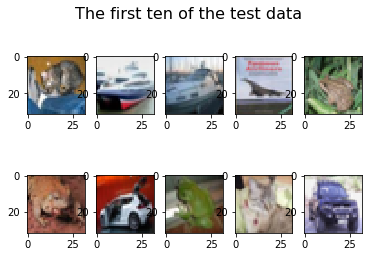

[3 8 9 8 6 6 1 6 6 5]


In [3]:
from keras import optimizers
from keras.applications.vgg16 import VGG16
from keras.datasets import cifar10
from keras.layers import Dense, Dropout, Flatten, Input
from keras.models import Model, Sequential
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 请对 input_tensor 进行定义
input_tensor = Input(shape=(32, 32, 3))

vgg16 = VGG16(include_top=False, weights='imagenet', input_tensor=input_tensor)

top_model = vgg16.output
top_model = Flatten(input_shape=vgg16.output_shape[1:])(top_model)
top_model = Dense(256, activation='sigmoid')(top_model)
top_model = Dropout(0.5)(top_model)
top_model = Dense(10, activation='softmax')(top_model)

# 请将 vgg16 和 top_model 连接起来
model = Model(inputs=vgg16.input, outputs=top_model)

# 请将到第 19 层网络层为止的权重进行固化处理
for layer in model.layers[:19]:
    layer.trainable = False

# 对模型进行确认
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

# 如果训练完毕的模型已经被保存了下来，则可以使用下面的代码直接读取所保存的模型
# model.load_weights('param_vgg.hdf5')

# 将批次尺寸设置为 32, epoch 数设置为 3 进行学习
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=3)

#  可以使用下面的代码对模型进行保存
model.save_weights('param_vgg.hdf5')

# 对精度进行评估
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# 对数据进行可视化处理（测试数据中开头的 10 张）
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i])
plt.suptitle("The first ten of the test data",fontsize=16)
plt.show()

# 进行预测（测试数据中开头的 10 张）
pred = np.argmax(model.predict(X_test[0:10]), axis=1)
print(pred)

**程序清单22.12：参考答案（输出结果可能和实际界面有所不同。）**

## ●22.5 附加习题

#### □习题

In [ ]:
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
% matplotlib inline

# 读入图像数据
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# 显示图像
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i])
plt.suptitle('original', fontsize=12)
plt.show()

# 请设置进行图像增强处理时所使用的参数（可自由设置）
generator = ImageDataGenerator(
                    rotation_range=    , # 旋转到90°
                    width_shift_range=   , # 在水平方向上进行随机平移
                    height_shift_range=    , # 在垂直方向上进行随机平移
                    channel_shift_range=    , # 随机地更改色调
                    shear_range=    , # 在斜向（pi/8）上进行拉伸
                    horizontal_flip=    , # 在垂直方向上进行随机翻转
                    vertical_flip=    # 在水平方向上进行随机翻转
                    )

# 请对图像进行增强处理（使用 .flow 传递需要处理的图像。请设置shuffle=False 方便我们在显示图像的时候进行对比）
extension = 
X_batch  = 

# 对生成的图像进行处理，使其更适于浏览
X_batch *= 127.0 / max(abs(X_batch.min()), X_batch.max())
X_batch += 127.0
X_batch = X_batch.astype('uint8')

# 显示经过增强处理后的数据
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_batch[i])
plt.suptitle('extension', fontsize=12)
plt.show()

**程序清单 22.13：习题**

#### □参考答案

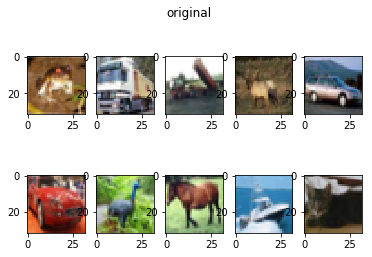

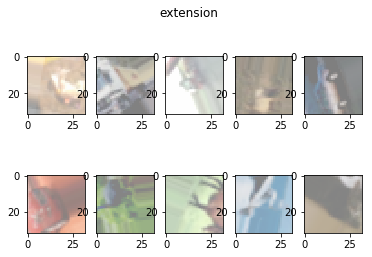

In [4]:
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
% matplotlib inline

# 读入图像数据
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# 显示图像
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i])
plt.suptitle('original', fontsize=12)
plt.show()

# 请设置进行图像增强处理时所使用的参数（可自由设置）
generator = ImageDataGenerator(
                    rotation_range=90, # 旋转到90° 
                    width_shift_range=0.3, # 在水平方向上进行随机平移 
                    height_shift_range=0.3, # 在垂直方向上进行随机平移 
                    channel_shift_range=70.0, # 随机地更改色调 
                    shear_range=0.39, # 在斜向（pi/8）上进行拉伸 
                    horizontal_flip=True, # 在垂直方向上进行随机翻转
                    vertical_flip=True # 在水平方向上进行随机翻转
                    )

# 请对图像进行增强处理（使用 .flow 传递需要处理的图像。请设置shuffle=False 方便我们在显示图像的时候进行对比）
extension = generator.flow(X_train,shuffle=False)
X_batch = extension.next()

# 对生成的图像进行处理，使其更适于浏览
X_batch *= 127.0 / max(abs(X_batch.min()), X_batch.max())
X_batch += 127.0
X_batch = X_batch.astype('uint8')

# 显示经过增强处理后的数据
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_batch[i])
plt.suptitle('extension', fontsize=12)
plt.show()

**程序清单 22.14：参考答案**

### ●综合附加习题

In [ ]:
from keras import optimizers
from keras.applications.vgg16 import VGG16
from keras.datasets import cifar10
from keras.layers import Dense, Dropout, Flatten, Input
from keras.models import Model, Sequential
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# 请载入数据
(X_train, y_train), (X_test, y_test) = 
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 请定义 input_tensor，并使用 vgg 的 ImageNet 来创建已经训练好的模型
input_tensor = 
vgg16 = 

# 创建用于特征量提取部分的模型
top_model = vgg16.output
top_model = Flatten(input_shape=vgg16.output_shape[1:])(top_model)
top_model = Dense(256, activation='sigmoid')(top_model)
top_model = Dropout(0.5)(top_model)
top_model = Dense(10, activation='softmax')(top_model)

# 请将 vgg16 和 top_model 连接起来
model = 

# 请将下面的 for 语句补充完整，对到第 15 层网络层为止的权重进行固化处理
for layer in :
    layer.trainable =

# 开始学习前，请对模型的结构进行确认
model.summary()

# 进行编译处理
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

# 如果训练完毕的模型已经被保存了下来，则可以使用下面的代码直接读取所保存的模型
# model.load_weights('param_vgg_15.hdf5')

# 请将批次尺寸设置为 32 并进行学习
model.fit()

#  可以使用下面的代码对模型进行保存
model.save_weights('param_vgg_15.hdf5')

# 对精度进行评估
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

**程序清单22.15：习题**

In [5]:
from keras import optimizers
from keras.applications.vgg16 import VGG16
from keras.datasets import cifar10
from keras.layers import Dense, Dropout, Flatten, Input
from keras.models import Model, Sequential
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# 请载入数据 
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 请定义 input_tensor，并使用 vgg 的 ImageNet 来创建已经训练好的模型
input_tensor = Input(shape=(32, 32, 3))
vgg16 = VGG16(include_top=False, weights='imagenet', input_tensor=input_tensor)

# 创建用于特征量提取部分的模型
top_model = vgg16.output
top_model = Flatten(input_shape=vgg16.output_shape[1:])(top_model)
top_model = Dense(256, activation='sigmoid')(top_model)
top_model = Dropout(0.5)(top_model)
top_model = Dense(10, activation='softmax')(top_model)

# 请将 vgg16 和 top_model 连接起来
model = Model(inputs=vgg16.input, outputs=top_model)

# 请将下面的 for 语句补充完整，对到第 15 层网络层为止的权重进行固化处理
for layer in model.layers[:15]:
    layer.trainable = False

# 开始学习前，请对模型的结构进行确认
model.summary()
# 进行编译处理
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

# 如果训练完毕的模型已经被保存了下来，则可以使用下面的代码直接读取所保存的模型
# model.load_weights('param_vgg_15.hdf5')

# 请将批次尺寸设置为 32 并进行学习
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=3)

#  可以使用下面的代码对模型进行保存
model.save_weights('param_vgg_15.hdf5')

# 对精度进行评估
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
__________

**程序清单22.16：参考答案（输出结果可能和实际界面有所不同。）**